# Downloading dataset from Kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"karanbhut","key":"8e528e53fbb1782b1257433ec295268e"}'}

In [ ]:
!pip install -q kaggle

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 3.0MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=f730eba58d5df6ed4c685044af5610924217dde8afed0308c5c9c3cac61768df
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c facebook-recruiting-iii-keyword-extraction

100% 2.89G/2.90G [00:30<00:00, 61.2MB/s]
100% 2.90G/2.90G [00:30<00:00, 101MB/s] 


In [ ]:
!apt-get install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
!unzip facebook-recruiting-iii-keyword-extraction.zip

Archive:  facebook-recruiting-iii-keyword-extraction.zip
  inflating: SampleSubmission.csv    
  inflating: Test.zip                
  inflating: Train.zip               


In [ ]:
!unzip Train.zip

Archive:  Train.zip
  inflating: Train.csv               


In [ ]:
!unzip Test.zip

Archive:  Test.zip
  inflating: Test.csv                


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
mv Train.csv Test.csv SampleSubmission.csv -t /content/gdrive/MyDrive/Colab\ Notebooks/

In [ ]:
!ls

facebook-recruiting-iii-keyword-extraction.zip	kaggle.json  Test.zip
gdrive						sample_data  Train.zip


In [ ]:
!rm Test.zip
!rm Train.zip
!rm facebook-recruiting-iii-keyword-extraction.zip

# Preprocessing and Data Analysis

## Data Analysis and getting data in required form for preprocessing

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Train.csv')
print(df.shape)
print(df.head())

(6034195, 4)
   Id  ...                                               Tags
0   1  ...  php image-processing file-upload upload mime-t...
1   2  ...                                            firefox
2   3  ...                          r matlab machine-learning
3   4  ...                                    c# url encoding
4   5  ...                          php api file-get-contents

[5 rows x 4 columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6034195 entries, 0 to 6034194
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Title   object
 2   Body    object
 3   Tags    object
dtypes: int64(1), object(3)
memory usage: 184.1+ MB


In [ ]:
df['Body'].head()

0    <p>I'd like to check if an uploaded file is an...
1    <p>In my favorite editor (vim), I regularly us...
2    <p>I am import matlab file and construct a dat...
3    <p>This is probably very simple, but I simply ...
4    <pre><code>function modify(.......)\n{\n  $mco...
Name: Body, dtype: object

Making subset of 535909 rows from original dataset

In [ ]:
#Randomly sampling 535,909 rows from 6034195 rows as mentioned in research-paper
df = df.sample(n=535909)

In [ ]:
df.to_csv('/content/gdrive/MyDrive/Colab Notebooks/Train_5l.csv')

In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Train_5l.csv')

Analysis of dataset

In [ ]:
print(df.shape)
print(df.head())

(535909, 5)
   Unnamed: 0  ...                                Tags
0     5098805  ...                 ios database sqlite
1     1379089  ...  jquery jquery-plugins clone listen
2     3724160  ...   applescript text-to-speech speech
3      475236  ...                     sql-server-2008
4     4802380  ...  javascript json extjs sencha-touch

[5 rows x 5 columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535909 entries, 0 to 535908
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  535909 non-null  int64 
 1   Id          535909 non-null  int64 
 2   Title       535909 non-null  object
 3   Body        535909 non-null  object
 4   Tags        535908 non-null  object
dtypes: int64(2), object(3)
memory usage: 20.4+ MB


In [ ]:
df['Body'].head()

0    <p>I have a simple question &amp; answers kind...
1    <p>I have some <code>&lt;tr&gt;</code> element...
2    <p>Is it possible to stop any speech that the ...
3    <p>so apparently SQL Server 2008 express doesn...
4    <p>i'm doing a simple parse of some JSON and i...
Name: Body, dtype: object

In [ ]:
df['Tags'].describe()

count      535908
unique     330351
top       android
freq         4407
Name: Tags, dtype: object

In [ ]:
df['Tags'].value_counts()[:20]

android              4407
php                  2778
jquery               2516
javascript jquery    2209
javascript           2200
java                 2117
c#                   1958
python               1473
php mysql            1464
mysql                1346
c++                  1275
html css             1161
iphone               1118
asp.net              1051
c# asp.net            905
ruby-on-rails         888
css                   798
java android          790
c                     734
r                     570
Name: Tags, dtype: int64

Finding duplicates

In [ ]:
dups = df.pivot_table(index = ['Id', 'Title', 'Body', 'Tags'], aggfunc ='size')


In [ ]:
print(dups.head())
print(dups.describe())

Id  Title                                                            Body                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [ ]:
duplicate = df[df.duplicated(['Title', 'Body', 'Tags'])]
print(duplicate.head())
print(duplicate.shape)

      Unnamed: 0  ...                                               Tags
5390     1661033  ...              javascript jquery div dynamic-content
5466     4290206  ...           javascript jquery jquery-validate onblur
5888     6026645  ...                                                css
5919      239812  ...                     jquery html ajax forms browser
9522     1672788  ...  microsoft-excel microsoft-excel-2007 microsoft...

[5 rows x 5 columns]
(16502, 5)


Removing duplicates

In [ ]:
# group rows having same value of title body and tags
no_dups = df.groupby(['Title', 'Body', 'Tags'],as_index=False).size()

In [ ]:
print(len(no_dups))

519406


In [ ]:
print(no_dups.columns)

Index(['Title', 'Body', 'Tags', 'size'], dtype='object')


In [ ]:
print(no_dups['size'].value_counts())

1    503111
2     16088
3       207
Name: size, dtype: int64


In [ ]:
# split the different tags with spaces and count
no_dups["tag_count"] = no_dups["Tags"].apply(lambda text: len(text.split(" ")))

In [ ]:
print(no_dups.head())

                                               Title  ... tag_count
0      java.sql.SQLException:[Microsoft][ODBC Dri...  ...         2
1    obtaining updated locations using gps in ser...  ...         3
2           "while( !feof( file ) )" is always wrong  ...         2
3   $ \sum\limits_{i=1}^{p-1} \Bigl( \Bigl\lfloor...  ...         3
4   $\mathbb{Z}_m \oplus \mathbb{Z}_n$ isomorphic...  ...         2

[5 rows x 5 columns]


In [ ]:
print(no_dups['tag_count'].value_counts())

3    148621
2    138225
4    100067
1     71110
5     61383
Name: tag_count, dtype: int64


In [ ]:
print(no_dups['tag_count'].mean())

2.8890809886678244


In [ ]:
no_duplicates = pd.DataFrame(no_dups, columns=['Title', 'Body', 'Tags'])

In [ ]:
no_duplicates.to_csv('/content/gdrive/MyDrive/Colab Notebooks/Train_no_dups.csv')

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Train_no_dups.csv')

In [ ]:
print(len(df))

519406


Feature extraction of Tags

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
tag_mat = vectorizer.fit_transform(df['Tags'])

In [ ]:
print("Number of data points :", tag_mat.shape[0])
print("Number of unique tags :", tag_mat.shape[1])

Number of data points : 519406
Number of unique tags : 30868


In [ ]:
tags = vectorizer.get_feature_names()
print("First 10 tags :", tags[:10])

First 10 tags : ['.a', '.app', '.aspxauth', '.bash-profile', '.class-file', '.cs-file', '.doc', '.ds-store', '.each', '.emf']


In [ ]:
freqs = tag_mat.sum(axis=0).A1
result = dict(zip(tags, freqs))

In [ ]:
tag_df = pd.DataFrame(list(result.items()),
                   columns=['Tags', 'Counts'])

In [ ]:
print(tag_df.head())
print(tag_df.columns)

            Tags  Counts
0             .a       3
1           .app       4
2      .aspxauth       2
3  .bash-profile      20
4    .class-file       8
Index(['Tags', 'Counts'], dtype='object')


In [ ]:
tag_df_sorted = tag_df.sort_values(['Counts'], ascending=False)
tag_counts = tag_df_sorted['Counts'].values

Analyzing how many times a tag appears in dataset

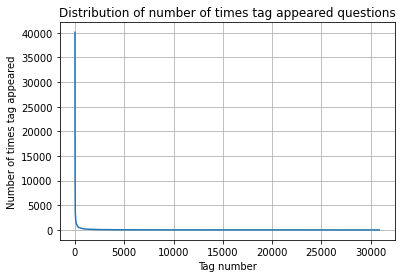

In [ ]:
import matplotlib.pyplot as plt
plt.plot(tag_counts)
plt.title("Distribution of number of times tag appeared questions")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

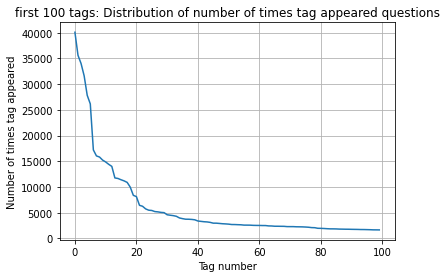

20 [40098 26167 14876 11417  8142  5444  4611  3857  3397  2978  2789  2598
  2533  2379  2305  2226  1969  1856  1780  1722]


In [ ]:
plt.plot(tag_counts[0:100])
plt.title('first 100 tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
print(len(tag_counts[0:100:5]), tag_counts[0:100:5])

Generation of wordcloud for tags in iiit symbol(tree) structure

In [ ]:
from wordcloud import WordCloud

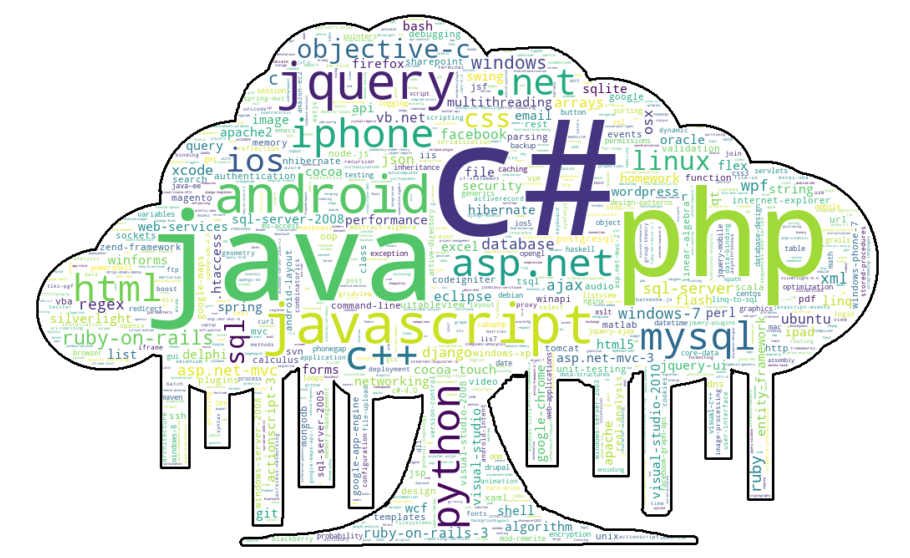

In [ ]:
import numpy as np
from PIL import Image
tup = dict(result.items())
alice_mask = np.array(Image.open("/content/gdrive/MyDrive/Colab Notebooks/iiit.png"))
wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,
               contour_width=3, contour_color='black')

wc.generate_from_frequencies(tup)
plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(wc, interpolation='bilinear')

In [ ]:
# TOP 20 Frequent tags
tag_df_sorted[:20]

,Tags,Counts
3243,c#,40098
13257,java,35614
19982,php,34015
13322,javascript,31630
907,android,27838
13658,jquery,26167
3250,c++,17216
21321,python,16055
12954,iphone,15835
1675,asp.net,15244


## Preprocessing

Importing required libraries and generating functions which will be used in preprocessing

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
def strip_html(data):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(data))
    return cleantext
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")

In [ ]:
df.columns

Index(['Unnamed: 0', 'Title', 'Body', 'Tags'], dtype='object')

In [ ]:
df[['Title','Body','Tags']]

,Title,Body,Tags
0,java.sql.SQLException:[Microsoft][ODBC Dri...,<p>I use the following code</p>\n\n<pre><code>...,java jdbc
1,obtaining updated locations using gps in ser...,<p>I have app in which i have two buttons <str...,android android-widget android-service
2,"""while( !feof( file ) )"" is always wrong",<p>I've started seeing <code>while( !feof( f )...,c feof
3,$ \sum\limits_{i=1}^{p-1} \Bigl( \Bigl\lfloor...,<p>I was working out some problems. This is gi...,number-theory functions inequality
4,$\mathbb{Z}_m \oplus \mathbb{Z}_n$ isomorphic...,"<p>I would like to know if, when $\gcd(m,n)=1$...",abstract-algebra modules
...,...,...,...
519401,"“var” variables, ""this"" variables and ""global""...","<p>After my last question, this one is more ac...",javascript constructor this var
519402,“xelatex: Command not found.” on network insta...,<p>I installed a TeX Live 2011 distribution on...,xetex errors texlive mactex texshop
519403,‬Implementation of a parser for ternary expres...,<blockquote>\n <p><strong>Possible Duplicate:...,homework haskell
519404,™ gets converted to â„ ¢ DOMDocument XPath,<p>If I have</p>\n\n<pre><code>&lt;p id='test'...,php javascript xpath domdocument


In [ ]:
df_np = np.array(df[['Title','Body','Tags']])

In [ ]:
print(df_np[0])

['    java.sql.SQLException:[Microsoft][ODBC Driver Manager] Invalid descriptor index'
 '<p>I use the following code</p>\n\n<pre><code>try {\n    Class.forName("sun.jdbc.odbc.JdbcOdbcDriver");\n    Connection con = DriverManager.getConnection("jdbc:odbc:access");\n    String sql = "Select * from table";\n    Statement stmt = con.createStatement();\n    ResultSet rs = stmt.executeQuery( sql );\n    ResultSetMetaData md = rs.getMetaData();\n    int columns = md.getColumnCount();\n    for (int i = 1; i &lt;= columns; i++) {\n        columnNames.addElement( md.getColumnName(i) );\n    }\n    while (rs.next()) {\n        Vector row = new Vector(columns);\n        for (int i = 1; i &lt;= columns; i++){\n            row.addElement( rs.getObject(i) );\n        }\n        data.addElement( row );\n    }\n    rs.close();\n    stmt.close();\n}catch(Exception e){\n    System.out.println(e);\n}\n</code></pre>\n\n<p>It displays:</p>\n\n<pre><code>java.sql.SQLException:[Microsoft][ODBC Driver Manager]

In [ ]:
print(df_np.shape)

(519406, 3)


In [ ]:
processed_df = pd.DataFrame()

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Preprocessing without thread

In [ ]:
import time
start = time.time()
for i,row in enumerate(df_np):
  if(i%17000==0):
    print(str(i) + " rows processed")
  title, question, tags = row[0], row[1], row[2]
  code = str(re.findall(r'<code>(.*?)</code>', question, flags=re.DOTALL)) 

  question=re.sub('<code>(.*?)</code>', '', question, flags=re.MULTILINE|re.DOTALL) # Removed code snippets from question
  question=strip_html(question.encode('utf-8'))

  title=title.encode('utf-8')

  question=str(title)+" "+str(title)+" "+str(title)+" "+str(question)
  question=re.sub(r'[^A-Za-z]+',' ',question) # Removed special characters from question
  words=word_tokenize(str(question.lower())) # Converted characters into lowercase

  question=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))

  # print(question)
  # print(tags)

  processed_df = processed_df.append({'question':question, 'tags':tags},ignore_index=True)
end = time.time()
print("Time taken to process data: "+str(end-start)+" Seconds")

0 rows processed
17000 rows processed
34000 rows processed
51000 rows processed
68000 rows processed
85000 rows processed
102000 rows processed
119000 rows processed
136000 rows processed
153000 rows processed
170000 rows processed
187000 rows processed
204000 rows processed
221000 rows processed
238000 rows processed
255000 rows processed
272000 rows processed
289000 rows processed
306000 rows processed
323000 rows processed
340000 rows processed
357000 rows processed
374000 rows processed
391000 rows processed
408000 rows processed
425000 rows processed
442000 rows processed
459000 rows processed
476000 rows processed
493000 rows processed
510000 rows processed
Time taken to process data: 11901.351175069809 Seconds


Preprocessing using multithreading

In [ ]:
def fun(index,df_np):
  processed_df = pd.DataFrame()
  for i,row in enumerate(df_np):
    if(i%20000==0):
      print(str(i) + " rows finished for thread-"+str(index+1))
    title, question, tags = row[0], row[1], row[2]
    code = str(re.findall(r'<code>(.*?)</code>', question, flags=re.DOTALL))

    question=re.sub('<code>(.*?)</code>', '', question, flags=re.MULTILINE|re.DOTALL)
    question=strip_html(question.encode('utf-8'))

    title=title.encode('utf-8')

    question=str(title)+" "+str(title)+" "+str(title)+" "+str(question)
    question=re.sub(r'[^A-Za-z]+',' ',question)
    words=word_tokenize(str(question.lower()))

    question=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))

    processed_df = processed_df.append({'question':question, 'tags':tags},ignore_index=True)
  return processed_df

In [ ]:
import concurrent.futures
range_list=[]
for i in range(0,480000,60000):
  range_list.append(df_np[i:i+60000])
range_list.append(df_np[480000:])
print("Total threads: ",len(range_list))

Total threads:  9


In [ ]:
import time
start2 = time.time()
frames=[]
with concurrent.futures.ThreadPoolExecutor() as executor:
  th_list=[]
  for i in range(len(range_list)):
    th_list.append(executor.submit(fun, i,range_list[i]))
  
  for i in th_list:
    frames.append(i.result())

result_df = pd.concat(frames)
print("Length of processed dataframe: "+str(len(result_df)))
end2 = time.time()
print("Time taken: "+str(end2-start2)+" seconds")

0 rows finished for thread-1
0 rows finished for thread-2
0 rows finished for thread-3
0 rows finished for thread-4
0 rows finished for thread-5
0 rows finished for thread-6
0 rows finished for thread-7
0 rows finished for thread-8
0 rows finished for thread-9
20000 rows finished for thread-4
20000 rows finished for thread-9
20000 rows finished for thread-8
20000 rows finished for thread-5
20000 rows finished for thread-1
20000 rows finished for thread-3
20000 rows finished for thread-2
20000 rows finished for thread-6
20000 rows finished for thread-7
40000 rows finished for thread-8
40000 rows finished for thread-4
40000 rows finished for thread-3
40000 rows finished for thread-6
40000 rows finished for thread-2
40000 rows finished for thread-1
40000 rows finished for thread-5
40000 rows finished for thread-7
Length of processed dataframe: 519406
Time taken: 3782.379077911377 seconds


As you can see, we have reduced preprocessing time by using multithreading. Preprocessing without thread took 3 times more time than preprocessing by multithreading.

In [ ]:
print(result_df.shape)

(519406, 2)


In [ ]:
print(result_df.head())

                                            question                                    tags
0  java sql sqlexcept microsoft odbc driver manag...                               java jdbc
1  obtain updat locat use gps servic obtain updat...  android android-widget android-service
2  feof file alway wrong feof file alway wrong fe...                                  c feof
3  sum limit bigl bigl lfloor frac bigr rfloor bi...      number-theory functions inequality
4  mathbb oplus mathbb isomorph mathbb mn mathbb ...                abstract-algebra modules


In [ ]:
result_df.to_csv('/content/gdrive/MyDrive/Colab Notebooks/processed_df.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
preprocessed_data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/processed_df.csv')

Mounted at /content/gdrive


In [ ]:
preprocessed_data.head()

,Unnamed: 0,question,tags
0,0,java sql sqlexcept microsoft odbc driver manag...,java jdbc
1,1,obtain updat locat use gps servic obtain updat...,android android-widget android-service
2,2,feof file alway wrong feof file alway wrong fe...,c feof
3,3,sum limit bigl bigl lfloor frac bigr rfloor bi...,number-theory functions inequality
4,4,mathbb oplus mathbb isomorph mathbb mn mathbb ...,abstract-algebra modules


In [ ]:
print("number of data points in sample :", preprocessed_data.shape[0])
print("number of dimensions :", preprocessed_data.shape[1])

number of data points in sample : 519406
number of dimensions : 3


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
multilabel_y = vectorizer.fit_transform(preprocessed_data['tags'])

In [ ]:
print(multilabel_y.shape)

(519406, 30868)


In [ ]:
print(multilabel_y)

  (0, 13257)	1
  (0, 13425)	1
  (1, 907)	1
  (1, 1115)	1
  (1, 1079)	1
  (2, 3242)	1
  (2, 9020)	1
  (3, 18261)	1
  (3, 9973)	1
  (3, 12435)	1
  (4, 213)	1
  (4, 16586)	1
  (5, 3351)	1
  (6, 19982)	1
  (6, 10608)	1
  (6, 10623)	1
  (6, 18328)	1
  (6, 10743)	1
  (7, 3242)	1
  (7, 3250)	1
  (7, 28874)	1
  (8, 907)	1
  (9, 5970)	1
  (9, 6465)	1
  (9, 6469)	1
  :	:
  (519399, 4324)	1
  (519399, 1384)	1
  (519399, 1318)	1
  (519400, 23541)	1
  (519400, 25262)	1
  (519400, 10649)	1
  (519401, 13322)	1
  (519401, 4987)	1
  (519401, 26910)	1
  (519401, 28516)	1
  (519402, 8312)	1
  (519402, 26736)	1
  (519402, 30342)	1
  (519402, 15358)	1
  (519402, 26732)	1
  (519403, 11270)	1
  (519403, 11551)	1
  (519404, 19982)	1
  (519404, 13322)	1
  (519404, 30514)	1
  (519404, 7307)	1
  (519405, 19982)	1
  (519405, 19994)	1
  (519405, 19983)	1
  (519405, 30772)	1


Here 519406 is the number of rows and 30868 are the unique tag labels, Taking these much tags is not computationally feasible.

In [ ]:
# choose top n most frequent occuring tags
# select all rows, and select columns of only top n tags.
def tags_to_choose(n):
    t = multilabel_y.sum(axis=0).tolist()[0]
    # print(t)
    sorted_tags_i = sorted(range(len(t)), key=lambda i: t[i], reverse=True)
    # print(sorted_tags_i)
    multilabel_yn=multilabel_y[:,sorted_tags_i[:n]]
    return multilabel_yn

In [ ]:
# returns row that contain no frequent tags
def rows_with_no_frequent(n):
    multilabel_yn = tags_to_choose(n)
    x= multilabel_yn.sum(axis=1)
    return (np.count_nonzero(x==0))

In [ ]:
multilabel_yn = tags_to_choose(10)
print(multilabel_yn.shape)

(519406, 10)


In [ ]:
import numpy as np
fraction_covered = []
total_tags=multilabel_y.shape[1]
total_qs=preprocessed_data.shape[0]
for i in range(500, total_tags, 100):
    fraction_covered.append(np.round(((total_qs-rows_with_no_frequent(i))/total_qs)*100,3))

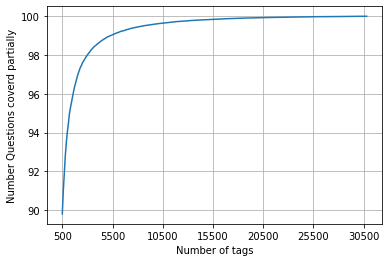

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(fraction_covered)
xlabel = list(np.array(range(-4500,33000,5000)))
ax.set_xticklabels(xlabel)
plt.xlabel("Number of tags")
plt.ylabel("Number Questions coverd partially")
plt.grid()
plt.show()


In [ ]:
print("with ",5500,"tags we are covering ",fraction_covered[50],"% of questions")

with  5500 tags we are covering  99.046 % of questions


In [ ]:
multilabel_yx = tags_to_choose(5500)
print("number of questions that are not covered :", rows_with_no_frequent(5500),"out of ", total_qs)

number of questions that are not covered : 4956 out of  519406


In [ ]:
print("Number of tags in sample :", multilabel_y.shape[1])
print("number of tags taken :", multilabel_yx.shape[1],"(",(multilabel_yx.shape[1]/multilabel_y.shape[1])*100,"%)")

Number of tags in sample : 30868
number of tags taken : 5500 ( 17.817804846442918 %)


In [ ]:
multilabel_yx = tags_to_choose(100)
print("number of questions that are not covered :", rows_with_no_frequent(100),"out of ", total_qs)

number of questions that are not covered : 126384 out of  519406


In [ ]:
print("Number of tags in sample :", multilabel_y.shape[1])
print("number of tags taken :", multilabel_yx.shape[1],"(",(multilabel_yx.shape[1]/multilabel_y.shape[1])*100,"%)")

Number of tags in sample : 30868
number of tags taken : 100 ( 0.32396008811714394 %)


So, we have chose 100 most frequent tags from 30868 total tags which covered almost 80% of whole dataset.

# Train Test Split and getting inputs ready for models

In [ ]:
total_size=preprocessed_data.shape[0]
train_size=int(0.99*total_size)

x_train=preprocessed_data.head(train_size)
x_test=preprocessed_data.tail(total_size - train_size)

y_train = multilabel_yx[0:train_size,:]
y_test = multilabel_yx[train_size:total_size,:]

In [ ]:
print("Number of data points in train data :", y_train.shape)
print("Number of data points in test data :", y_test.shape)

Number of data points in train data : (514211, 100)
Number of data points in test data : (5195, 100)


Feature extraction of questions

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from datetime import datetime
start = datetime.now()
vectorizer = TfidfVectorizer(min_df=0.00009, max_features=20000, smooth_idf=True, norm="l2", \
                             tokenizer = lambda x: x.split(), sublinear_tf=False, ngram_range=(1,3))
x_train_multilabel = vectorizer.fit_transform(x_train['question'])
x_test_multilabel = vectorizer.transform(x_test['question'])
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:04:27.174403


In [ ]:
print("Dimensions of train data X:",x_train_multilabel.shape, "Y :",y_train.shape)
print("Dimensions of test data X:",x_test_multilabel.shape,"Y:",y_test.shape)

Dimensions of train data X: (514211, 20000) Y : (514211, 100)
Dimensions of test data X: (5195, 20000) Y: (5195, 100)


We are storing 4 values(x_train_multilabel,x_test_multilabel,y_train,y_test) which will be used during model training and testing using pickle library in google drive. It is very useful in case of any failure.In that case, we don't have to perform all computation again. we can just load pre-computed values from google drive.

In [ ]:
import pickle
with open('/content/gdrive/MyDrive/Colab Notebooks/objs_100.pkl', 'wb') as f: 
    pickle.dump([x_train_multilabel, x_test_multilabel, y_train,y_test], f)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import pickle
with open('/content/gdrive/MyDrive/Colab Notebooks/objs_100.pkl','rb') as f:
    x_train_multilabel, x_test_multilabel, y_train,y_test = pickle.load(f)

Mounted at /content/gdrive


# Models

As different models requires different computing time, we have categorized these models based on their required time into 3 groups having different dataset size to compare them more efficiently. 
 - Group 1 contains Naive-bayes, logistic regression and SGD training based linear classifiers(SVM and logistic). 
 - Group 2 contains Decision-Tree and KNN.
 - Group 3 contains Random-Forest and Neural-Networks.

## Group 1 (on 519406 data): 

### Naive Bayes Classifier

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report,accuracy_score
import warnings
warnings.filterwarnings("ignore")
import time

In [ ]:
from sklearn.naive_bayes import MultinomialNB
start = time.time()
classifier_NB = OneVsRestClassifier(MultinomialNB(fit_prior=True, class_prior=None), n_jobs=-1)
classifier_NB.fit(x_train_multilabel, y_train)
y_NB = classifier_NB.predict (x_test_multilabel)
time_NB = time.time() - start

print("Accuracy: ",accuracy_score(y_test, y_NB))
print("Classification Report: ")
print(classification_report(y_test, y_NB))
print("Time taken: ", time_NB)

Accuracy:  0.3258902791145332
Classification Report: 
              precision    recall  f1-score   support

           0       0.43      0.22      0.29       316
           1       0.72      0.32      0.45       322
           2       0.63      0.33      0.43       330
           3       0.68      0.40      0.50       329
           4       0.86      0.55      0.67       211
           5       0.57      0.49      0.53       196
           6       0.57      0.25      0.35       216
           7       0.82      0.25      0.38       189
           8       0.54      0.28      0.37       160
           9       0.78      0.33      0.47       172
          10       0.69      0.42      0.52       106
          11       0.41      0.17      0.24       166
          12       0.22      0.04      0.07       122
          13       0.29      0.12      0.17       111
          14       0.31      0.12      0.17        95
          15       0.40      0.30      0.34        70
          16       0.68    

### SGD training with linear SVM Classifier



In [ ]:
from sklearn.linear_model import SGDClassifier
start = time.time()
classifier = OneVsRestClassifier(SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None))
classifier.fit(x_train_multilabel, y_train)
y_linearSVM = classifier.predict (x_test_multilabel)
time_linearSVM = time.time() - start

print("Accuracy: ",accuracy_score(y_test, y_linearSVM))
print("Classification Report: ")
print (classification_report(y_test, y_linearSVM))
print("Time taken: ", time_linearSVM)

Accuracy:  0.30356111645813283
Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       316
           1       0.83      0.18      0.30       322
           2       0.77      0.22      0.34       330
           3       0.93      0.12      0.21       329
           4       0.95      0.39      0.56       211
           5       0.91      0.32      0.47       196
           6       0.00      0.00      0.00       216
           7       0.90      0.23      0.36       189
           8       0.67      0.01      0.02       160
           9       1.00      0.01      0.02       172
          10       0.96      0.22      0.35       106
          11       0.00      0.00      0.00       166
          12       0.00      0.00      0.00       122
          13       0.00      0.00      0.00       111
          14       0.00      0.00      0.00        95
          15       0.00      0.00      0.00        70
          16       1.00   

### SGD training with Logistic Classifier



In [ ]:
start = time.time()
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(x_train_multilabel, y_train)
y_SGDLOG = classifier.predict(x_test_multilabel)
time_SGDLOG = time.time() - start

print("Accuracy: ",accuracy_score(y_test,y_SGDLOG))
print("Classification Report: ")
print(classification_report(y_test, y_SGDLOG))
print("Time taken: ", time_SGDLOG)

Accuracy:  0.39037536092396535
Classification Report: 
              precision    recall  f1-score   support

           0       0.52      0.27      0.36       316
           1       0.79      0.40      0.53       322
           2       0.69      0.44      0.54       330
           3       0.79      0.39      0.52       329
           4       0.91      0.68      0.78       211
           5       0.85      0.47      0.61       196
           6       0.62      0.22      0.32       216
           7       0.83      0.53      0.65       189
           8       0.64      0.31      0.41       160
           9       0.79      0.34      0.48       172
          10       0.86      0.52      0.65       106
          11       0.56      0.17      0.26       166
          12       0.52      0.13      0.21       122
          13       0.54      0.17      0.26       111
          14       0.43      0.14      0.21        95
          15       0.57      0.23      0.33        70
          16       0.79   

### Logistic Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
start = time.time()
classifier_2 = OneVsRestClassifier(LogisticRegression(penalty='l2'), n_jobs=-1)
classifier_2.fit(x_train_multilabel, y_train)
y_LOG = classifier_2.predict(x_test_multilabel)
time_LOG = time.time() - start

print("Accuracy: ",accuracy_score(y_test, y_LOG))
print("Classification Report: ")
print (classification_report(y_test, y_LOG))
print("Time taken to run this cell :", time_LOG)

Accuracy:  0.4061597690086622
Classification Report: 
              precision    recall  f1-score   support

           0       0.57      0.32      0.41       316
           1       0.80      0.43      0.56       322
           2       0.70      0.47      0.56       330
           3       0.80      0.45      0.57       329
           4       0.91      0.70      0.79       211
           5       0.83      0.51      0.63       196
           6       0.62      0.26      0.37       216
           7       0.84      0.57      0.68       189
           8       0.65      0.34      0.44       160
           9       0.81      0.35      0.49       172
          10       0.86      0.51      0.64       106
          11       0.56      0.18      0.27       166
          12       0.62      0.13      0.22       122
          13       0.53      0.16      0.25       111
          14       0.42      0.16      0.23        95
          15       0.58      0.27      0.37        70
          16       0.78    

### Accuracy and time Representation for group 1 models:

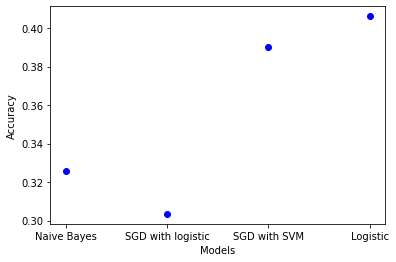

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score
a1=accuracy_score(y_test,y_NB)
a2=accuracy_score(y_test,y_SGDLOG)
a3=accuracy_score(y_test,y_linearSVM)
a4=accuracy_score(y_test,y_LOG)
plt.plot(["Naive Bayes","SGD with logistic","SGD with SVM","Logistic"],[a1,a2,a3,a4],'bo')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.show()

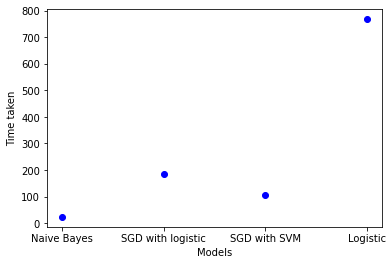

In [ ]:
plt.plot(["Naive Bayes","SGD with logistic","SGD with SVM","Logistic"],[time_NB,time_SGDLOG,time_linearSVM,time_LOG],'bo') 
plt.ylabel('Time taken')
plt.xlabel('Models')
plt.show()

## Group 2 (on 80000 data): 

### KNN classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(3)
knn = OneVsRestClassifier(model2)
knn.fit(x_train_multilabel[:80000], y_train[:80000])

OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=3,
                                                   p=2, weights='uniform'),
                    n_jobs=None)

In [ ]:
y_pred1 = knn.predict(x_test_multilabel[:1000])
acc_KNN = accuracy_score(y_test[:1000], y_pred1)
print("Accuracy :",acc_KNN)

Accuracy : 0.312


### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(max_depth=3)
dt = OneVsRestClassifier(model1)
dt.fit(x_train_multilabel[:80000], y_train[:80000])
y_pred = dt.predict(x_test_multilabel[:1000])

In [ ]:
acc_DT = accuracy_score(y_test[:1000], y_pred)
print("Accuracy :",acc_DT)

Accuracy : 0.371


### Accuracy Comparison for group 2 models:

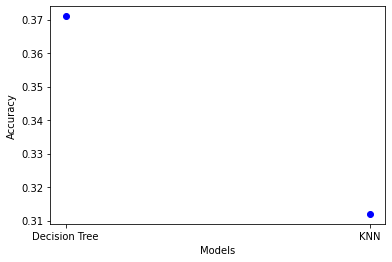

In [ ]:
import matplotlib.pyplot as plt
plt.plot(["Decision Tree","KNN"],[acc_DT,acc_KNN])
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.show()

## Group 3 (on 35000 data):

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
RF = OneVsRestClassifier(clf)
RF.fit(x_train_multilabel[:35000], y_train[:35000])

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                            

In [ ]:
y_test2 = RF.predict(x_test_multilabel[:1000])

In [ ]:
acc_RF = accuracy_score(y_test[:1000], y_test2)
import pickle
with open('/content/gdrive/MyDrive/Colab Notebooks/RF.pkl', 'wb') as f: 
    pickle.dump([acc_RF], f)
print("Accuracy :",acc_RF)

Accuracy : 0.353


### Classification using Neural Network:

In [ ]:
import numpy as np
from keras.models import Sequential
from keras import layers

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import pickle
with open('/content/gdrive/MyDrive/Colab Notebooks/objs_100.pkl','rb') as f:
    x_train_multilabel, x_test_multilabel, y_train,y_test = pickle.load(f)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from keras.regularizers import l2
model = Sequential([
    layers.Dense(10000,activation='relu'),
    layers.BatchNormalization(momentum=0.99,epsilon=0.001),
    layers.Dense(100, activation='softmax')
])
X_TRAIN = x_train_multilabel[:35000].toarray()
Y_TRAIN = y_train[:35000].toarray()
X_TEST = x_test_multilabel[:1000].toarray()
Y_TEST = y_test[:1000].toarray()

In [ ]:
model.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])
adam_train = model.fit(X_TRAIN, Y_TRAIN, epochs=10, verbose=1)
adam_test = model.evaluate(X_TEST,Y_TEST,verbose=0)
adam_train = adam_train.history['accuracy']
adam_test = adam_test[1]
import pickle
with open('/content/gdrive/MyDrive/Colab Notebooks/adam.pkl', 'wb') as f: 
    pickle.dump([adam_train,adam_test], f)

Epoch 1/10
1094/1094 [==============================] - 85s 77ms/step - loss: 44.1396 - accuracy: 0.3351
Epoch 2/10
1094/1094 [==============================] - 83s 76ms/step - loss: 187.4062 - accuracy: 0.3893
Epoch 3/10
1094/1094 [==============================] - 83s 76ms/step - loss: 326.5794 - accuracy: 0.4145
Epoch 4/10
1094/1094 [==============================] - 83s 76ms/step - loss: 478.0068 - accuracy: 0.4305
Epoch 5/10
1094/1094 [==============================] - 83s 76ms/step - loss: 650.3912 - accuracy: 0.4292
Epoch 6/10
1094/1094 [==============================] - 84s 76ms/step - loss: 830.0164 - accuracy: 0.4320
Epoch 7/10
1094/1094 [==============================] - 83s 76ms/step - loss: 1003.0488 - accuracy: 0.4360
Epoch 8/10
1094/1094 [==============================] - 83s 76ms/step - loss: 1286.7276 - accuracy: 0.4366
Epoch 9/10
1094/1094 [==============================] - 83s 76ms/step - loss: 1481.9966 - accuracy: 0.4433
Epoch 10/10
1094/1094 [=====================

In [ ]:
model.compile(optimizer='SGD',
              loss="categorical_crossentropy",
              metrics=['accuracy'])
SGD_train = model.fit(X_TRAIN, Y_TRAIN, epochs=10, verbose=1)
SGD_test = model.evaluate(X_TEST,Y_TEST,verbose=0)
SGD_train = SGD_train.history['accuracy']
SGD_test = SGD_test[1]
import pickle
with open('/content/gdrive/MyDrive/Colab Notebooks/SGD.pkl', 'wb') as f: 
    pickle.dump([SGD_train,SGD_test], f)

Epoch 1/10
1094/1094 [==============================] - 56s 50ms/step - loss: 4.0203 - accuracy: 0.3520
Epoch 2/10
1094/1094 [==============================] - 54s 50ms/step - loss: 5.9017 - accuracy: 0.4712
Epoch 3/10
1094/1094 [==============================] - 54s 50ms/step - loss: 22.7015 - accuracy: 0.4556
Epoch 4/10
1094/1094 [==============================] - 54s 50ms/step - loss: 78.6383 - accuracy: 0.4329
Epoch 5/10
1094/1094 [==============================] - 54s 50ms/step - loss: 245.1801 - accuracy: 0.4041
Epoch 6/10
1094/1094 [==============================] - 54s 50ms/step - loss: 749.9960 - accuracy: 0.3813
Epoch 7/10
1094/1094 [==============================] - 54s 50ms/step - loss: 2455.4058 - accuracy: 0.3588
Epoch 8/10
1094/1094 [==============================] - 54s 50ms/step - loss: 9045.2152 - accuracy: 0.3364
Epoch 9/10
1094/1094 [==============================] - 54s 50ms/step - loss: 33033.0738 - accuracy: 0.3193
Epoch 10/10
1094/1094 [=========================

In [ ]:
model.compile(optimizer='RMSprop',
              loss="categorical_crossentropy",
              metrics=['accuracy'])
RMS_train = model.fit(X_TRAIN, Y_TRAIN, epochs=10, verbose=1)
RMS_test = model.evaluate(X_TEST,Y_TEST,verbose=0)
RMS_train = RMS_train.history['accuracy']
RMS_test = RMS_test[1]
import pickle
with open('/content/gdrive/MyDrive/Colab Notebooks/RMS.pkl', 'wb') as f: 
    pickle.dump([RMS_train,RMS_test], f)

Epoch 1/10
1094/1094 [==============================] - 167s 151ms/step - loss: 27.8950 - accuracy: 0.3464
Epoch 2/10
1094/1094 [==============================] - 165s 151ms/step - loss: 134.2164 - accuracy: 0.3903
Epoch 3/10
1094/1094 [==============================] - 165s 151ms/step - loss: 265.8936 - accuracy: 0.3949
Epoch 4/10
1094/1094 [==============================] - 165s 151ms/step - loss: 437.9841 - accuracy: 0.3856
Epoch 5/10
1094/1094 [==============================] - 165s 151ms/step - loss: 600.9689 - accuracy: 0.3952
Epoch 6/10
1094/1094 [==============================] - 165s 151ms/step - loss: 826.1445 - accuracy: 0.3917
Epoch 7/10
1094/1094 [==============================] - 165s 151ms/step - loss: 1029.3947 - accuracy: 0.4032
Epoch 8/10
1094/1094 [==============================] - 165s 151ms/step - loss: 1324.7510 - accuracy: 0.3990
Epoch 9/10
1094/1094 [==============================] - 165s 151ms/step - loss: 1600.7278 - accuracy: 0.3971
Epoch 10/10
1094/1094 [===

In [ ]:
import pickle
with open('/content/gdrive/MyDrive/Colab Notebooks/adam.pkl','rb') as f:
    adam_train,adam_test = pickle.load(f)
    
with open('/content/gdrive/MyDrive/Colab Notebooks/SGD.pkl','rb') as f:
    SGD_train,SGD_test = pickle.load(f)
    
with open('/content/gdrive/MyDrive/Colab Notebooks/RMS.pkl','rb') as f:
    RMS_train,RMS_test = pickle.load(f)
    

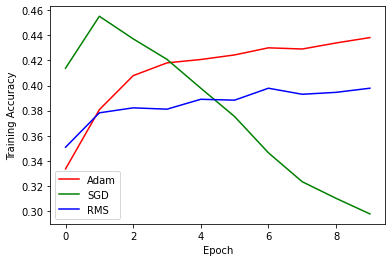


Test Accuracy:
Adam: 0.2080
RMSprop: 0.1490
SGD: 0.1790


In [ ]:
import matplotlib.pyplot as plt
plt.plot(adam_train, color='r', label='Adam')
plt.plot(SGD_train, color='g', label='SGD')
plt.plot(RMS_train, color='b', label='RMS')
plt.legend()
plt.ylabel('Training Accuracy')
plt.xlabel('Epoch')
plt.show()
print("\nTest Accuracy:") 
print(f"Adam: {adam_test:.4f}")
print(f"RMSprop: {RMS_test:.4f}")
print(f"SGD: {SGD_test:.4f}")

In [ ]:
acc_NN = max([adam_test,RMS_test,SGD_test])
import pickle
with open('/content/gdrive/MyDrive/Colab Notebooks/NN.pkl', 'wb') as f: 
    pickle.dump([acc_NN], f)

### Accuracy Comparison for group 3 models:

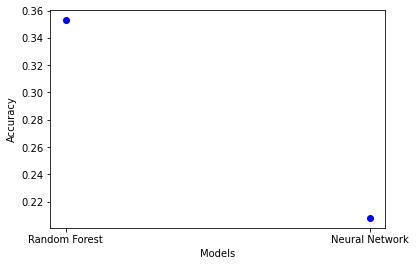

In [ ]:
import matplotlib.pyplot as plt
import pickle
with open('/content/gdrive/MyDrive/Colab Notebooks/RF.pkl','rb') as f:
    acc_RF = pickle.load(f)
with open('/content/gdrive/MyDrive/Colab Notebooks/NN.pkl','rb') as f:
    acc_NN = pickle.load(f)
plt.plot(["Random Forest","Neural Network"],[acc_RF,acc_NN],'bo')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.show()